# INTELLIHACK 5.0 - TEAM HYPER TUNERS
## Task 2 - Customer Segmentation


##### Objective:
###### Build a machine learning model to identify distinct customer segments based on their behavior on an e-commerce platform. The goal is to categorize customers into three hidden clusters: Bargain Hunters, High Spenders, and Window Shoppers using clustering techniques.

##### Dataset:
###### customer_behavior_analytcis.csv (customer_id, total_purchases, avg_cart_value, total_time_spent, product_click, discount_counts)

##### Approach:

###### Preprocess data to handle missing values, outliers, and feature scaling.
###### Perform exploratory data analysis (EDA) to uncover patterns and relationships.
###### Train and evaluate clustering models, focusing on KMeans for segmentation.
###### Optimize the clustering process through hyperparameter tuning.
###### Visualize and analyze the identified customer clusters.

##### Content
###### Data Preprocessing for Customer Segmentation
###### Exploratory Data Analysis (EDA)
###### Visualize the Data
###### Model Selection
###### Evaluate Clustering
###### Visualize Clusters Using PCA

## Data Preprocessing for Customer Segmentation

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

### Handling the data set 

In [2]:
import os

# Original file name (with spelling mistake)
old_name = 'customer_behavior_analytcis.csv'
new_name = 'customer_behavior_analytics.csv'

# Rename the file
os.rename(old_name, new_name)

print(f"File renamed from '{old_name}' to '{new_name}'")

File renamed from 'customer_behavior_analytcis.csv' to 'customer_behavior_analytics.csv'


In [3]:
# Load the data set 
df = pd.read_csv('customer_behavior_analytics.csv')
# Display basic info and statistics
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   total_purchases   979 non-null    float64
 1   avg_cart_value    979 non-null    float64
 2   total_time_spent  999 non-null    float64
 3   product_click     979 non-null    float64
 4   discount_counts   999 non-null    float64
 5   customer_id       999 non-null    object 
dtypes: float64(5), object(1)
memory usage: 47.0+ KB
None
       total_purchases  avg_cart_value  total_time_spent  product_click  \
count       979.000000      979.000000        999.000000     979.000000   
mean         11.570991       75.457978         49.348759      28.237998   
std           7.016327       55.067835         32.730973      16.296384   
min           0.000000       10.260000          5.120000       4.000000   
25%           6.000000       33.130000         22.375000      16.000000   
50%         

#### Fill missing numerical values with median


In [4]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

# Check for remaining missing values
print(df.isnull().sum())

# Drop non-informative columns
df.drop(columns=['customer_id'])

total_purchases     0
avg_cart_value      0
total_time_spent    0
product_click       0
discount_counts     0
customer_id         0
dtype: int64


,total_purchases,avg_cart_value,total_time_spent,product_click,discount_counts
0,7.0,129.34,52.17,18.0,0.0
1,22.0,24.18,9.19,15.0,7.0
2,2.0,32.18,90.69,50.0,2.0
3,25.0,26.85,11.22,16.0,10.0
4,7.0,125.45,34.19,30.0,3.0
...,...,...,...,...,...
994,5.0,64.64,72.70,50.0,1.0
995,5.0,68.36,75.41,43.0,1.0
996,18.0,19.53,28.77,18.0,8.0
997,4.0,28.97,72.27,57.0,3.0


##  Exploratory Data Analysis (EDA)

### Visualize the Data

#### Histograms

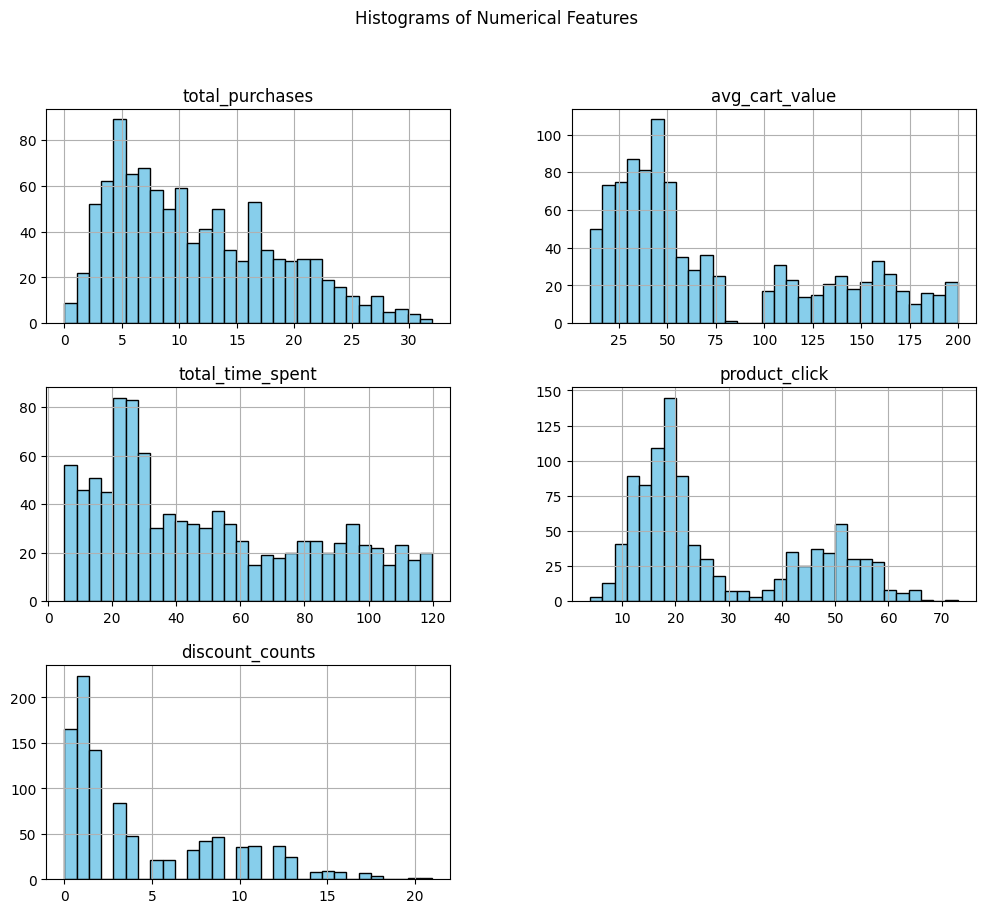

In [5]:
df[numerical_cols].hist(figsize=(12, 10), bins=30, color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Numerical Features')
plt.show()


#### Outlier detection

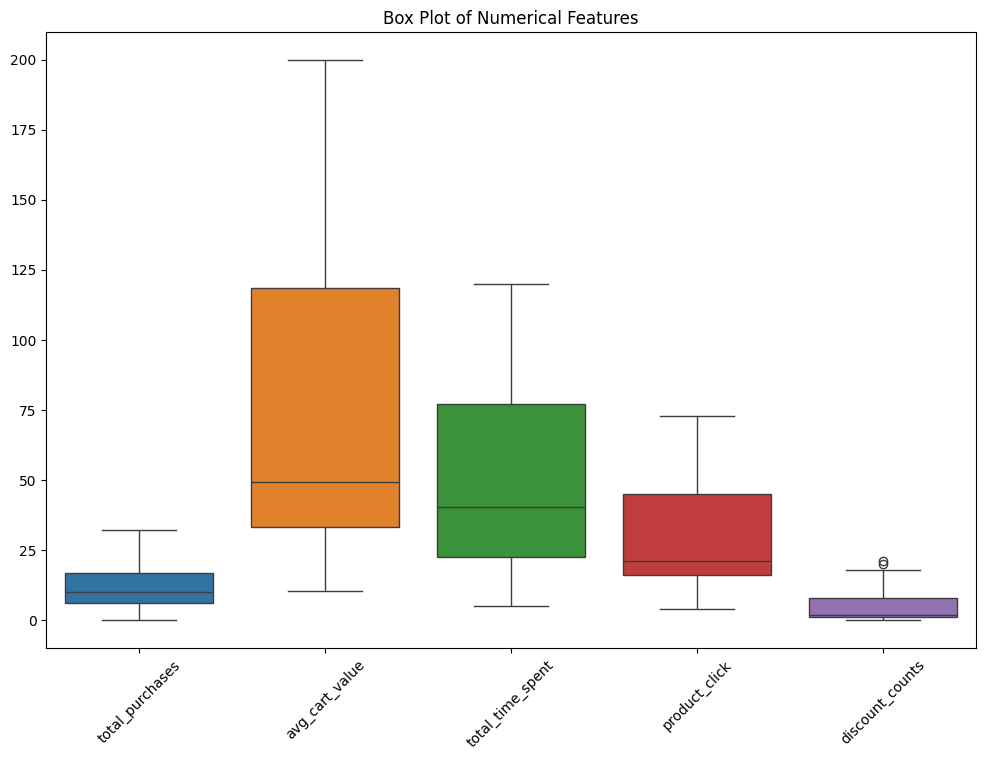

In [6]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numerical_cols])
plt.title('Box Plot of Numerical Features')
plt.xticks(rotation=45)
plt.show()


#### Measure skewness

In [7]:
skewness = df[numerical_cols].skew()
print(f"Skewness of numerical features:\n{skewness}")


Skewness of numerical features:
total_purchases     0.656645
avg_cart_value      0.816758
total_time_spent    0.564760
product_click       0.718501
discount_counts     1.070385
dtype: float64


In [8]:
import numpy as np  # Import numpy

features_sqrt = ['total_purchases', 'total_time_spent']
features_log = ['avg_cart_value', 'product_click', 'discount_counts']

# Apply square root transformation 
for feature in features_sqrt:
    df[feature] = np.sqrt(df[feature])

# Apply log transformation 
for feature in features_log:
    df[feature] = np.log1p(df[feature])

#### Pairplot

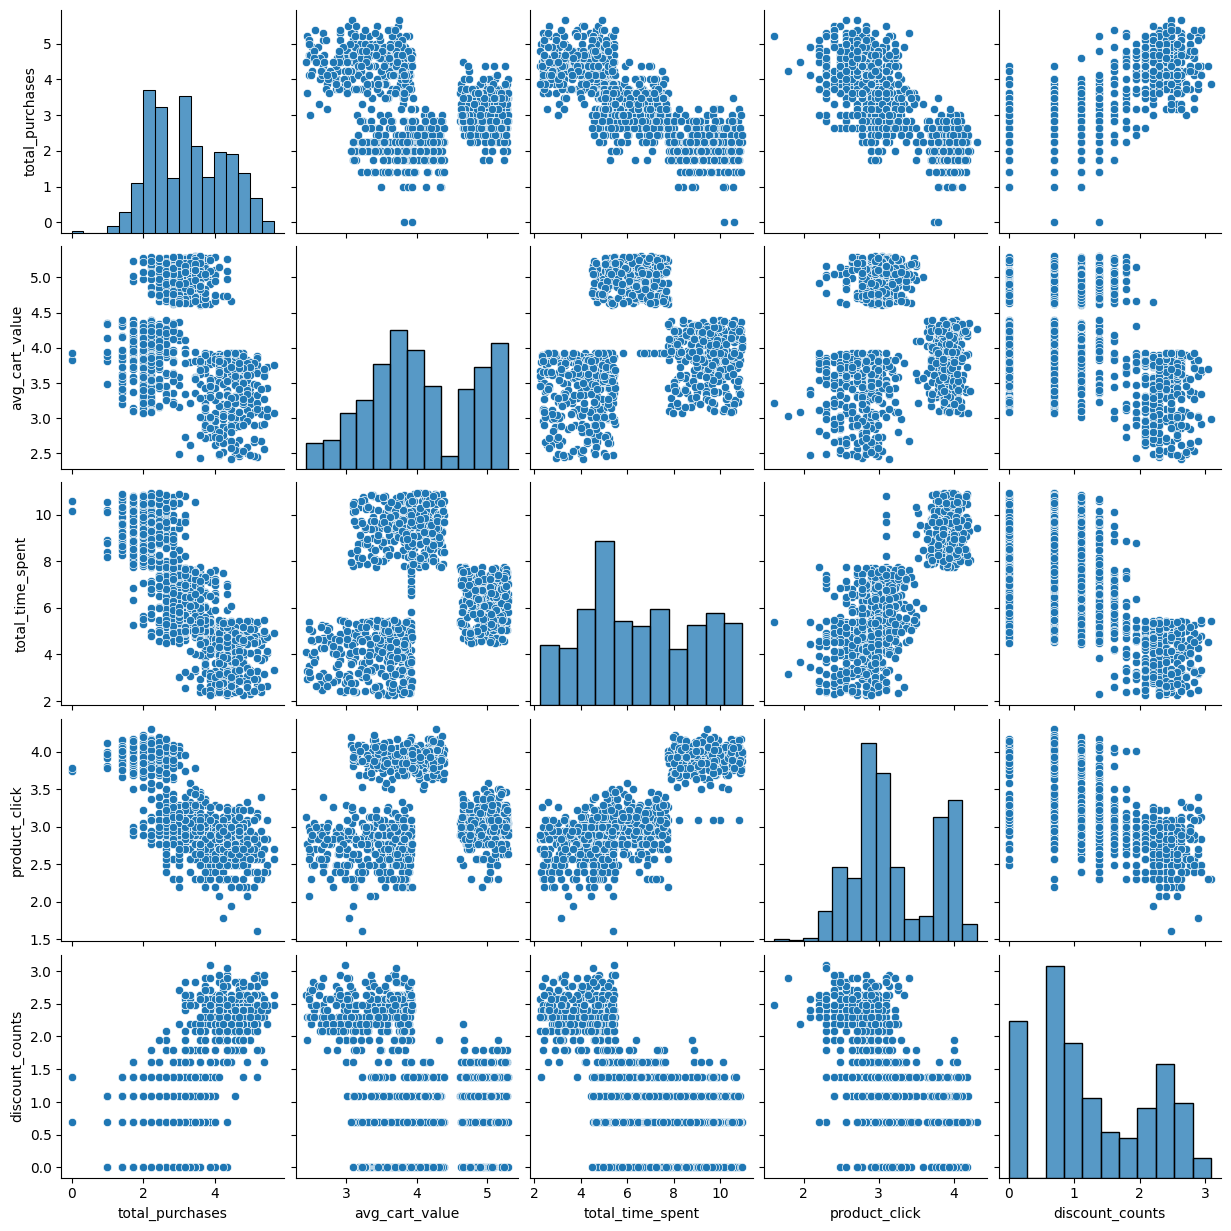

In [9]:
#Feature relationships
sns.pairplot(df)
plt.show()

#### Correlation heatmap


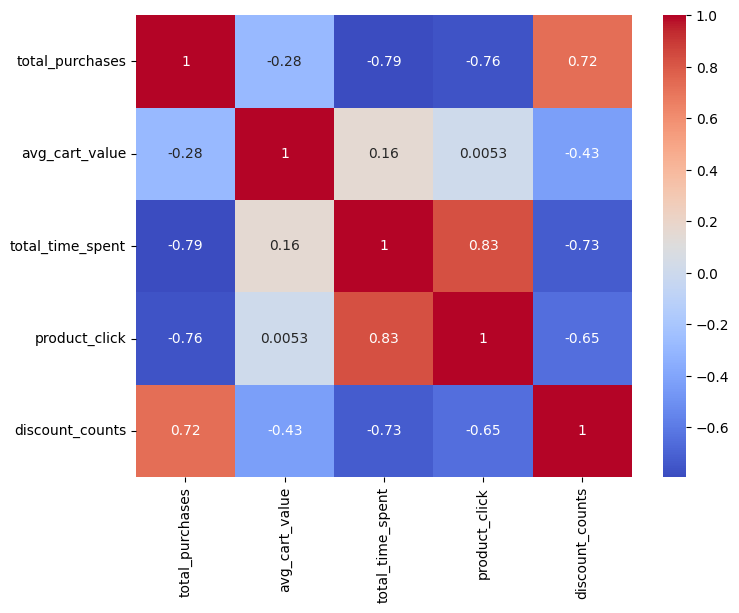

In [10]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.drop(columns=['customer_id']).corr(), annot=True, cmap='coolwarm')
plt.show()

In [11]:
# Data preprocessing
scaler =MinMaxScaler()
X = scaler.fit_transform(df.drop(columns=['customer_id']))

## Model Selection

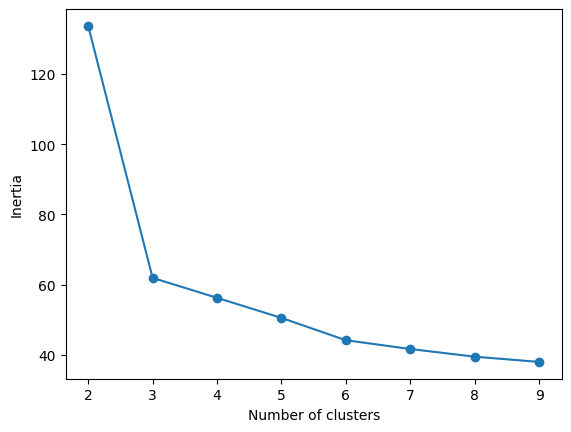

In [12]:
# Determine optimal clusters using Elbow Method
inertia = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=5)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    
plt.plot(range(2, 10), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [13]:
# Choose optimal clusters (e.g., 3)
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)

The number of clusters has already taken as 3

In [14]:
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)

### Evaluate clustering

In [15]:
sil_score = silhouette_score(X, labels)
print(f'Silhouette Score: {sil_score}')

Silhouette Score: 0.5556797927534346


### Visualize clusters using PCA


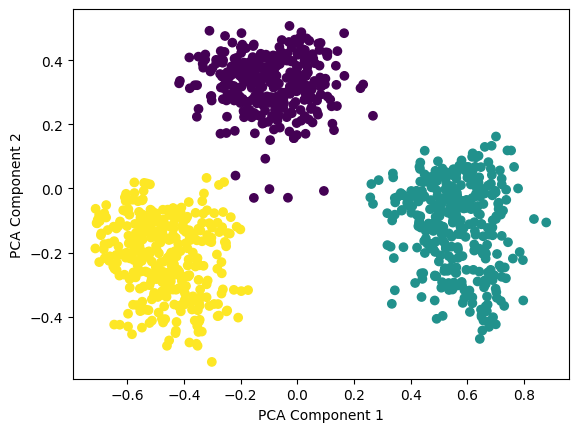

In [16]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [17]:
# Add cluster labels to original data
df['cluster'] = labels
print(df.head())


   total_purchases  avg_cart_value  total_time_spent  product_click  \
0         2.645751        4.870146          7.222880       2.944439   
1         4.690416        3.226050          3.031501       2.772589   
2         1.414214        3.501947          9.523130       3.931826   
3         5.000000        3.326833          3.349627       2.833213   
4         2.645751        4.839847          5.847222       3.433987   

   discount_counts customer_id  cluster  
0         0.000000     CM00000        0  
1         2.079442     CM00001        1  
2         1.098612     CM00002        2  
3         2.397895     CM00003        1  
4         1.386294     CM00004        0  
